In [1]:
import datetime
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
stock = pd.read_csv("C:/AI/stock.csv")

In [3]:
stock

,일자,종목코드,종목명,거래량,시가,고가,저가,종가
0,20210601,A060310,3S,166690,2890,2970,2885,2920
1,20210601,A095570,AJ네트웍스,63836,5860,5940,5750,5780
2,20210601,A006840,AK홀딩스,103691,35500,35600,34150,34400
3,20210601,A054620,APS,462544,14600,14950,13800,14950
4,20210601,A265520,AP시스템,131987,29150,29150,28800,29050
...,...,...,...,...,...,...,...,...
987995,20230530,A189980,흥국에프엔비,272284,3005,3035,2955,2980
987996,20230530,A000540,흥국화재,50218,3250,3255,3195,3215
987997,20230530,A003280,흥아해운,130664,1344,1395,1340,1370
987998,20230530,A037440,희림,141932,9170,9260,9170,9200


In [4]:
stock.columns = ['Date', 'Code', 'Name', 'Volume', 'Open', 'High', 'Low','Close']

In [5]:
stock['Name'].value_counts()

Name
3S         494
유화증권       494
이녹스        494
이노테라피      494
이노와이어리스    494
          ... 
바이브컴퍼니     494
바이넥스       494
바른손이앤에이    494
바른손        494
힘스         494
Name: count, Length: 2000, dtype: int64

In [6]:
stock_Pr = stock[stock['Code']=='A000540']

In [7]:
stock_Pr = stock_Pr [['Date', 'Open', 'High', 'Low', 'Close', 'Volume']]

In [8]:
stock_Pr

,Date,Open,High,Low,Close,Volume
1996,20210601,4520,4650,4505,4630,199673
3996,20210602,4635,4730,4605,4715,185590
5996,20210603,4740,4740,4640,4685,177850
7996,20210604,4685,4790,4685,4715,194274
9996,20210607,4730,4745,4635,4660,154293
...,...,...,...,...,...,...
979996,20230523,3255,3290,3240,3290,15204
981996,20230524,3300,3395,3265,3310,36018
983996,20230525,3325,3350,3270,3295,36852
985996,20230526,3320,3320,3230,3235,24860


In [9]:
stock_Pr['Date'].value_counts()

Date
20210601    1
20221017    1
20221013    1
20221012    1
20221011    1
           ..
20220120    1
20220119    1
20220118    1
20220117    1
20230530    1
Name: count, Length: 494, dtype: int64

In [10]:
def MinMaxScaler(data):
    """최솟값과 최댓값을 이용하여 0 ~ 1 값으로 변환"""
    numerator = data - np.min(data, 0)
    denominator = np.max(data, 0) - np.min(data, 0)
    # 0으로 나누기 에러가 발생하지 않도록 매우 작은 값(1e-7)을 더해서 나눔
    return numerator / (denominator + 1e-7)

In [11]:
dfx = stock_Pr[['Open','High','Low','Volume', 'Close']]
dfx = MinMaxScaler(dfx)
dfy = dfx[['Close']]
dfx = dfx[['Open','High','Low','Volume']]
dfx

,Open,High,Low,Volume
1996,0.738562,0.769231,0.880102,0.013925
3996,0.788671,0.803419,0.931122,0.012921
5996,0.834423,0.807692,0.948980,0.012369
7996,0.810458,0.829060,0.971939,0.013540
9996,0.830065,0.809829,0.946429,0.010689
...,...,...,...,...
979996,0.187364,0.188034,0.234694,0.000769
981996,0.206972,0.232906,0.247449,0.002254
983996,0.217865,0.213675,0.250000,0.002313
985996,0.215686,0.200855,0.229592,0.001458


In [12]:
dfx.describe()

,Open,High,Low,Volume
count,494.000000,494.000000,494.000000,494.000000
mean,0.353806,0.359887,0.410528,0.007911
std,0.189041,0.185074,0.215511,0.047049
min,0.000000,0.000000,0.000000,0.000000
25%,0.205338,0.211538,0.247449,0.001672
50%,0.344227,0.358974,0.408163,0.003184
75%,0.455338,0.464744,0.528061,0.005594
max,1.000000,1.000000,1.000000,1.000000


In [13]:
# 두 데이터를 리스트 형태로 저장
X = dfx.values.tolist()
y = dfy.values.tolist()

In [14]:
#순차 훈련 데이터로 - 1
window_size = 10

data_X = []
data_y = []
for i in range(len(y) - window_size):
    _X = X[i : i + window_size] # 다음 날 종가(i+windows_size)는 포함되지 않음
    _y = y[i + window_size]     # 다음 날 종가
    data_X.append(_X)
    data_y.append(_y)
print(_X, "->", _y)

[[0.28104575162174095, 0.27136752135592446, 0.24744897957921178, 0.014073304048152848], [0.2244008714499172, 0.27564102562924614, 0.2627551020274104, 0.015448177511725681], [0.21568627450040584, 0.24786324785265543, 0.275510204067576, 0.002633712114134305], [0.2374727668741842, 0.2264957264860472, 0.25765306121134424, 0.002644267216977379], [0.20261437907613883, 0.19017094016281322, 0.24234693876314556, 0.0031081925142354594], [0.1895424836518718, 0.18376068375283075, 0.22959183672298, 0.0027235731248253397], [0.18736383441449397, 0.1880341880261524, 0.23469387753904622, 0.0007692387788202392], [0.2069716775508945, 0.23290598289602968, 0.24744897957921178, 0.0022536570935211904], [0.21786492373778368, 0.21367521366608228, 0.2499999999872449, 0.002313136524407161], [0.21568627450040584, 0.20085470084611734, 0.22959183672298, 0.00145788792106836]] -> [0.19191919190949902]


In [15]:
#순차 훈련 데이터로 - 2 (함수로)
#def make_sample(data, window) :
#    train = []
#    target = []
#    for i in range(len(data)-window):
#        train.append(data[i:i+window])
#        train.append(data[i+window])
#    return np.array(train), np,array(target)

In [16]:
print('전체 데이터의 크기 :', len(data_X), len(data_y))

전체 데이터의 크기 : 484 484


In [17]:
train_size = int(len(data_y) * 0.7)
train_X = np.array(data_X[0 : train_size])
train_y = np.array(data_y[0 : train_size])

test_size = len(data_y) - train_size
test_X = np.array(data_X[train_size : len(data_X)])
test_y = np.array(data_y[train_size : len(data_y)])

print('훈련 데이터의 크기 :', train_X.shape, train_y.shape)
print('테스트 데이터의 크기 :', test_X.shape, test_y.shape)

훈련 데이터의 크기 : (338, 10, 4) (338, 1)
테스트 데이터의 크기 : (146, 10, 4) (146, 1)


In [18]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout, RNN, SimpleRNN

In [19]:
# 모델 초기화
model = Sequential()

# 첫 번째 RNN 레이어와 Dropout 레이어 추가
model.add(SimpleRNN(20, activation='relu', input_shape=(10, 4), return_sequences=True))
model.add(Dropout(0.5))

# 두 번째 RNN 레이어와 Dropout 레이어 추가
model.add(SimpleRNN(20, activation='relu'))
model.add(Dropout(0.3))

# 최종 출력을 위한 Dense 레이어 추가
model.add(Dense(1))

# 모델 요약 출력
model.summary()

C:\Users\tpfzl\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)               │ (None, 10, 20)              │             500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 10, 20)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_1 (SimpleRNN)             │ (None, 20)                  │             820 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 20)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              21 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,341 (5.24 KB)

 Trainable params: 1,341 (5.24 KB)

 Non-trainable params: 0 (0.00 B)

In [20]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(train_X, train_y, epochs=70, batch_size=30)
pred_y = model.predict(test_X)

Epoch 1/70
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.5953
Epoch 2/70
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2905 
Epoch 3/70
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1690 
Epoch 4/70
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1056 
Epoch 5/70
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0760 
Epoch 6/70
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0639 
Epoch 7/70
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0587 
Epoch 8/70
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0505 
Epoch 9/70
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0533 
Epoch 10/70
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0482 
Epoch 11/70
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0634 
Epoch 12/70
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0484
Epoch 13/70
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0419
Epoch 14/70
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0393 
Epoch 15/70
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0327 
Epoch 1

In [21]:
model.evaluate(test_X, test_y)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step - loss: 0.0022   


0.0021764410194009542

In [22]:
y_pred = model.predict(test_X)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


In [23]:
mse = tf.reduce_mean(tf.square(test_y - y_pred))

print(f'MSE: {mse.numpy()}')

MSE: 0.0021691144241302147


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


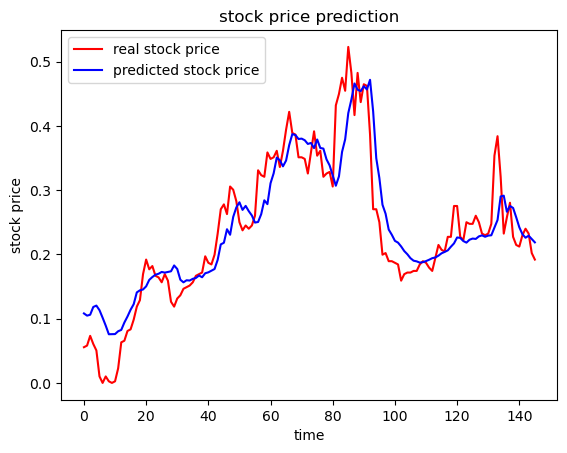

In [24]:
pred_y = model.predict(test_X)

plt.figure()
plt.plot(test_y, color='red', label='real stock price')
plt.plot(pred_y, color='blue', label='predicted stock price')
plt.title('stock price prediction')
plt.xlabel('time')
plt.ylabel('stock price')
plt.legend()
plt.show()
